# Dataset Directories Initialization

In [249]:
import os.path
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sklearn
import sklearn.tree
import sklearn.ensemble
import sklearn.datasets
import sklearn.metrics
import pandas as pd
from sklearn.model_selection import train_test_split
import glob
import time

import warnings
warnings.filterwarnings("ignore")  # Ignore sklearn deprecation warnings
warnings.filterwarnings("ignore", category=FutureWarning)       # Ignore sklearn deprecation warnings

In [250]:
current_directory = os.path.dirname(os.getcwd())
project_directory = os.path.split(current_directory)[0]
dataset_directory = os.path.join(project_directory, 'datasets')

occupancy_dataset_directory = os.path.join(dataset_directory, '1_occupancy')
healthy_older_people_dataset_directory = os.path.join(dataset_directory, '2_healthy_older_people')
bitcoin_heist_ransonware_address_dataset_directory = os.path.join(dataset_directory, '3_bitcoin_heist_ransonware_address')
bank_additional_dataset_directory = os.path.join(dataset_directory, '4_bank_additional')
montreal_crime_dataset_directory = os.path.join(dataset_directory, '5_interventionscitoyendo')
credit_cards_dataset_directory = os.path.join(dataset_directory, '6_credit_cards')
census_income_dataset_directory = os.path.join(dataset_directory, '7_census_income')
yeast_dataset_directory = os.path.join(dataset_directory, '8_yeast')
magic_gamma_dataset_directory = os.path.join(dataset_directory, '9_magic_gamma')

print(os.listdir(dataset_directory))
print(occupancy_dataset_directory
      , healthy_older_people_dataset_directory
      , bitcoin_heist_ransonware_address_dataset_directory
      , bank_additional_dataset_directory)

results=np.zeros((8, 9, 4))
datasets=np.array(['Occupancy', 'Bank Marketing', 'Activity Recognition', 'Bitcoin Ransomware', 
                      'Montreal Crime', 'Credit Card', 'Census Income', 'Yeast', 
                      'Magic Gamma Telescope'])
methods=np.array(['K-nearest neighbours', 'Support vector', 'Decision tree', 'Random forest',
                     'AdaBoost', 'Logistic regression', 'Gaussian naive Bayes', 'Neural network'])
stats_labels=np.array(['Elapsed Time', 'Training Accuracy Score', 'Testing Accuracy score', 'ROC AUC score'])

['1_occupancy', '2_healthy_older_people', '3_bitcoin_heist_ransonware_address', '4_bank_additional', '5_interventionscitoyendo', '6_credit_cards', '7_census_income', '8_yeast', '9_magic_gamma', 'urls.txt']
D:\pravesh\Concordia\2020-Fall\COMP-6321_ML\project\COMP-6321-ML\datasets\1_occupancy D:\pravesh\Concordia\2020-Fall\COMP-6321_ML\project\COMP-6321-ML\datasets\2_healthy_older_people D:\pravesh\Concordia\2020-Fall\COMP-6321_ML\project\COMP-6321-ML\datasets\3_bitcoin_heist_ransonware_address D:\pravesh\Concordia\2020-Fall\COMP-6321_ML\project\COMP-6321-ML\datasets\4_bank_additional


In [251]:
best_estimator_info = {}
best_estimator_info[1] = {}
best_estimator_info[2] = {}
best_estimator_info[3] = {}
best_estimator_info[4] = {}
best_estimator_info[5] = {}
best_estimator_info[6] = {}
best_estimator_info[7] = {}
best_estimator_info[8] = {}

# Utilities

In [252]:
# Model plotting code
def plotModel (m, t, X_train, y_train, X_test, y_test):
    z_train=m.predict(X_train)
    z_test=m.predict(X_test)
    print (m)
    ac_train=sklearn.metrics.accuracy_score(y_train, z_train)*100
    ac_test=sklearn.metrics.accuracy_score(y_test, z_test)*100
    print ("Elapsed time:            "+"{:.4f}".format(t)+" sec")
    print ("Training accuracy score: "+"{:.4f}".format(ac_train)+"%")
    print ("Test accuracy score:     "+"{:.4f}".format(ac_test)+"%")
    if np.unique(y_train).size>2:
        lb = sklearn.preprocessing.LabelBinarizer()
        yy_test=lb.fit_transform(y_test)
        zz_test=lb.transform(z_test)
        roc=sklearn.metrics.roc_auc_score(yy_test, zz_test, multi_class="ovr", average="weighted")*100
        print ("ROC AUC score:           "+"{:.4f}".format(roc)+"%")
    else:
        roc=sklearn.metrics.roc_auc_score(y_test, z_test)*100
        print ("ROC AUC score:           "+"{:.4f}".format(roc)+"%")
        sklearn.metrics.plot_roc_curve(m, X_test, y_test)
    return ac_train, ac_test, roc

<div style="border-bottom: 3px solid black; margin-bottom:5px"></div>
<div style="border-bottom: 3px solid black"></div>

# 1. Occupancy Dataset

## 1.1. Data Loading

In [253]:
training_dataset_url = os.path.join(occupancy_dataset_directory, 'occupancy_data', 'datatraining.txt')
test_dataset_url = os.path.join(occupancy_dataset_directory, 'occupancy_data', 'datatest.txt')

training_data_file = np.loadtxt(training_dataset_url, delimiter=',', skiprows=1, usecols = (2,3,4,5,6,7))
X1=training_data_file[:, 0:5]
y1=training_data_file[:, 5].astype(np.int32)
test_data_file = np.loadtxt(test_dataset_url, delimiter=',', skiprows=1, usecols = (2,3,4,5,6,7))
X2=test_data_file[:, 0:5]
y2=test_data_file[:, 5].astype(np.int32)

X = np.concatenate((X1, X2))
y = np.concatenate((y1, y2))

print(X.shape)
X = X[:5000]
y = y[:5000]

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(X_train.shape, X_test.shape)

(10808, 5)
(4000, 5) (1000, 5)


## 1.2. Data Analysis & Cleaning

### 1.2.1. Statistics

In [254]:
# No of Attributed

columns = np.array(["Temperature", "Humidity", "Light", "CO2", "HumidityRatio"])
print('Input Columns Count:', X_train.shape[1])
print('Input Columns:', columns)
print('Output Column:', "Occupancy")
print()
print('Training Data')
print('Number of Rows:', X_train.shape[0])
print()
print('Test Data')
print('Number of Rows:', X_test.shape[0])

Input Columns Count: 5
Input Columns: ['Temperature' 'Humidity' 'Light' 'CO2' 'HumidityRatio']
Output Column: Occupancy

Training Data
Number of Rows: 4000

Test Data
Number of Rows: 1000


In [255]:
stats = np.vstack((X_train.std(axis=0), X_train.mean(axis=0), X_train.min(axis=0), X_train.max(axis=0)))
    
for i in range(5):
    print(columns[i], ': mean=', stats[0][i], ', std=', stats[1][i]
          , 'max=', stats[3][i], 'min=', stats[2][i]
          , ', ptp=', np.ptp(X_train[:, i]))


Temperature : mean= 0.991405133458457 , std= 20.932108708332944 max= 23.18 min= 19.2 , ptp= 3.9800000000000004
Humidity : mean= 3.8378950238048333 , std= 22.472796291666363 max= 31.65 min= 16.745 , ptp= 14.904999999999998
Light : mean= 205.14002642144 , std= 133.28583749999999 max= 1546.33333333333 min= 0.0 , ptp= 1546.33333333333
CO2 : mean= 199.71356121370886 , std= 562.6948770833329 max= 1139.0 min= 423.0 , ptp= 716.0
HumidityRatio : mean= 0.0006224682601441902 , std= 0.003442084859202568 max= 0.00481738641740953 min= 0.00267412691390407 , ptp= 0.0021432595035054598


### 1.2.2. Feature Value Densities

Text(0.5, 1.0, 'HumidityRatio[4]')

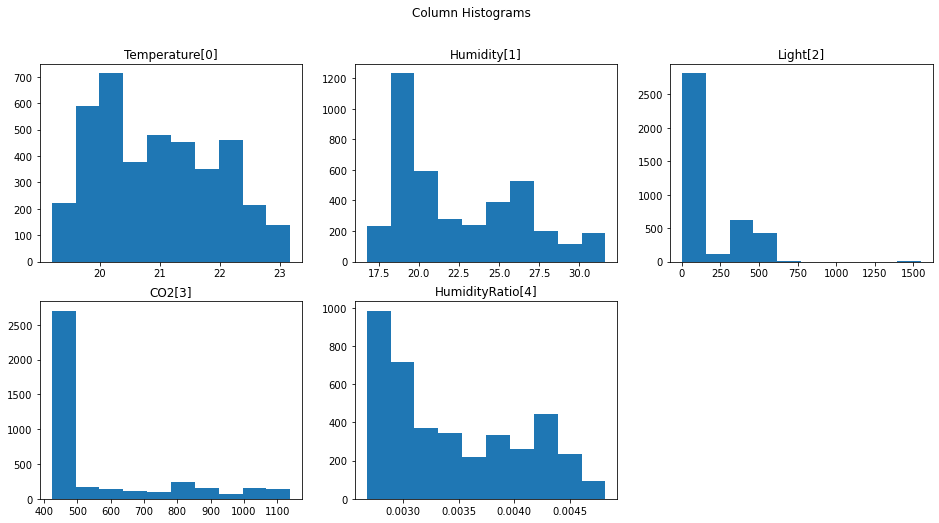

In [256]:

fig = plt.figure(figsize=(16, 8)) 
fig.suptitle('Column Histograms')

ax = fig.add_subplot(2, 3, 1) 
ax.hist(X_train[:, 0], bins=10)
ax.set_title('Temperature[0]')

ax = fig.add_subplot(2, 3, 2) 
ax.hist(X_train[:, 1], bins=10)
ax.set_title('Humidity[1]')

ax = fig.add_subplot(2, 3, 3) 
ax.hist(X_train[:, 2], bins=10)
ax.set_title('Light[2]')

ax = fig.add_subplot(2, 3, 4) 
ax.hist(X_train[:, 3], bins=10)
ax.set_title('CO2[3]')

ax = fig.add_subplot(2, 3, 5) 
ax.hist(X_train[:, 4], bins=10)
ax.set_title('HumidityRatio[4]')

### 1.2.3. Checking Outliners

Text(0.5, 1.0, 'HumidityRatio[4]')

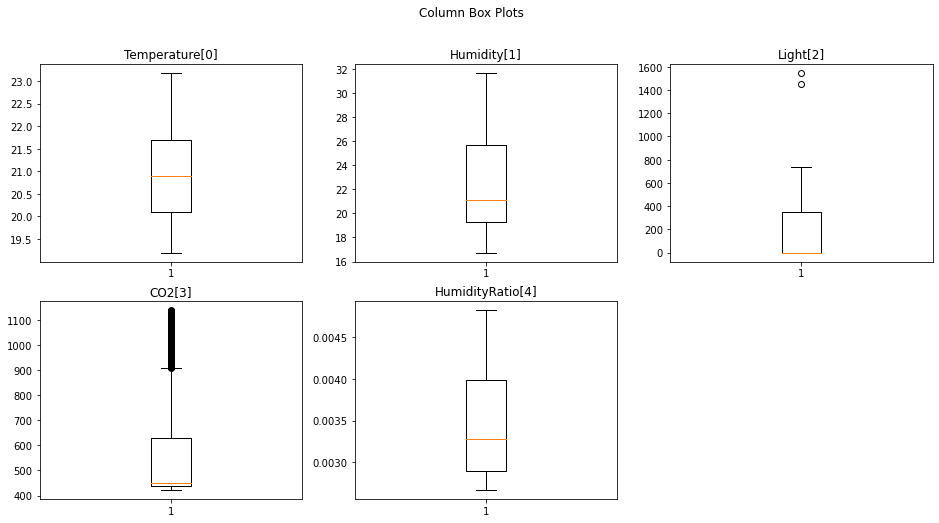

In [257]:
fig = plt.figure(figsize=(16, 8))
fig.suptitle('Column Box Plots')

ax = fig.add_subplot(2, 3, 1) 
ax.boxplot(X_train[:, 0])
ax.set_title('Temperature[0]')

ax = fig.add_subplot(2, 3, 2) 
ax.boxplot(X_train[:, 1])
ax.set_title('Humidity[1]')

ax = fig.add_subplot(2, 3, 3) 
ax.boxplot(X_train[:, 2])
ax.set_title('Light[2]')

ax = fig.add_subplot(2, 3, 4) 
ax.boxplot(X_train[:, 3])
ax.set_title('CO2[3]')

ax = fig.add_subplot(2, 3, 5) 
ax.boxplot(X_train[:, 4])
ax.set_title('HumidityRatio[4]')

## 1.3. Model Evaluation

### 1.3.1. Logistic Regression

 #### 1.3.1.1. Without Feature Scaling

In [258]:
lr_model_1 = sklearn.linear_model.LogisticRegression(random_state=0)
lr_model_1.fit(X_train, y_train);
z_train_1 = lr_model_1.predict(X_train)
z_test_1 = lr_model_1.predict(X_test)
print(sklearn.metrics.accuracy_score(y_train, z_train_1)*100)
print(sklearn.metrics.accuracy_score(y_test, z_test_1)*100)

97.625
98.7


#### 1.3.1.2. With Standardization

In [259]:
scaler = sklearn.preprocessing.StandardScaler().fit(X_train)
X_train_2 = scaler.transform(X_train)
X_test_2 = scaler.transform(X_test)

lr_model_2 = sklearn.linear_model.LogisticRegression(random_state=0)
lr_model_2.fit(X_train_2, y_train);
z_train_2 = lr_model_2.predict(X_train_2)
z_test_2 = lr_model_2.predict(X_test_2)
print(sklearn.metrics.accuracy_score(y_train, z_train_2)*100)
print(sklearn.metrics.accuracy_score(y_test, z_test_2)*100)

97.6
98.7


#### 1.3.1.3. With Normalization

In [260]:
scaler = sklearn.preprocessing.MaxAbsScaler().fit(X_train)
X_train_2 = scaler.transform(X_train)
X_test_2 = scaler.transform(X_test)

lr_model_2 = sklearn.linear_model.LogisticRegression(random_state=0)
lr_model_2.fit(X_train_2, y_train);
z_train_2 = lr_model_2.predict(X_train_2)
z_test_2 = lr_model_2.predict(X_test_2)
print(sklearn.metrics.accuracy_score(y_train, z_train_2)*100)
print(sklearn.metrics.accuracy_score(y_test, z_test_2)*100)

96.8
97.6


In [261]:
start_time = time.time()
lr_model = sklearn.linear_model.LogisticRegression(n_jobs=-1)

max_iter_values = 2**np.linspace(8, 15, 8, dtype=np.int32)
solver_values = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
fit_intercept_values = [True, False]
penalty_values = ['none', 'l1', 'l2']
random_state_values = [0]
C_values = 2**np.linspace(1, 4, 4, dtype=np.int32)
param_grid = { "fit_intercept":fit_intercept_values, "solver": solver_values
              , "max_iter": max_iter_values, 'penalty': penalty_values
             , 'random_state': random_state_values, 'C': C_values}

gridcv = sklearn.model_selection.GridSearchCV(lr_model, param_grid, verbose=0, cv=5)
gridcv.fit(X_train, y_train)
lr_best_estimator = gridcv.best_estimator_
lr_best_estimator_score = gridcv.best_score_
end_time = time.time()
print('Time: ', (end_time-start_time), ' seconds')
best_estimator_info[1]['lr'] = gridcv

Time:  643.2319595813751  seconds


LogisticRegression(C=2, max_iter=256, n_jobs=-1, penalty='none', random_state=0)
Elapsed time:            643.2320 sec
Training accuracy score: 97.6250%
Test accuracy score:     98.7000%
ROC AUC score:           98.8627%


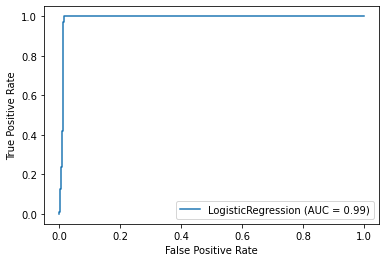

In [262]:
results [5, 0, 0] = (end_time-start_time)
results [5, 0, 1], results [5, 0, 2], results [5, 0, 3] = plotModel (lr_best_estimator, (end_time-start_time), X_train, y_train, X_test, y_test)

### 1.3.2. K-Means

In [263]:
start_time = time.time()
knn_model = sklearn.neighbors.KNeighborsClassifier(n_jobs=-1)
n_neighbor_values =  2**np.linspace(1, 8, 8, dtype=np.int32)
param_grid = {"n_neighbors": n_neighbor_values}

gridcv = sklearn.model_selection.GridSearchCV(knn_model, param_grid, verbose=0, cv=5)
gridcv.fit(X_train, y_train)
knn_best_estimator = gridcv.best_estimator_
knn_best_estimator_score = gridcv.best_score_
end_time = time.time()
print('Time: ', (end_time-start_time), ' seconds')
best_estimator_info[1]['knn'] = gridcv

Time:  1.5604043006896973  seconds


KNeighborsClassifier(n_jobs=-1, n_neighbors=8)
Elapsed time:            1.5604 sec
Training accuracy score: 98.4500%
Test accuracy score:     98.7000%
ROC AUC score:           98.8627%


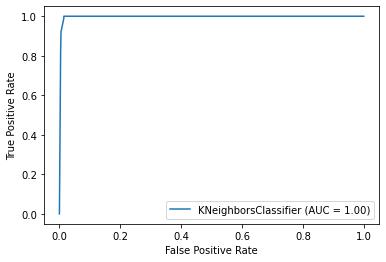

In [264]:
results [0, 0, 0] = (end_time-start_time)
results [0, 0, 1], results [0, 0, 2], results [0, 0, 3] = plotModel (knn_best_estimator, (end_time-start_time), X_train, y_train, X_test, y_test)

# 2. Bank Marketting Dataset

## 2.1. Data Loading

In [265]:
training_dataset_url = os.path.join(bank_additional_dataset_directory, 'bank-additional', 'bank-additional', 'bank-additional-full.csv')
test_dataset_url = os.path.join(bank_additional_dataset_directory, 'bank-additional', 'bank-additional', 'bank-additional.csv')
print(training_dataset_url, test_dataset_url)


# Loading code
job_mapping = {'admin.':1, 'blue-collar':2, 'entrepreneur':3
               , 'housemaid':4, 'management':5, 'retired':6
               , 'self-employed':7, 'services':8, 'student':9
               , 'technician':10, 'unemployed':11, 'unknown':0}
boolean_mapping ={'no': 0, 'yes': 1}
marital_mapping ={'divorced':1, 'married':2, 'single':3}
education_mapping={'basic.4y':1, 'basic.6y':2, 'basic.9y':3
                   , 'high.school':4, 'illiterate':5, 'professional.course':6
                   , 'university.degree':7}
contact_mapping={'cellular':1, 'telephone':2}
month_mapping={'may':5, 'jun':6, 'nov':11
               , 'sep':9, 'jul':7, 'aug':8
               , 'mar':3, 'oct':10, 'apr':4
               , 'dec':12}
day_mapping={'fri':5, 'wed':3, 'mon':1, 'thu':4, 'tue':2}
poutcome_mapping={'nonexistent':1, 'failure':2, 'success':3}

R=pd.read_csv(training_dataset_url, delimiter=';').replace(boolean_mapping).replace(job_mapping).replace(marital_mapping).replace(education_mapping).replace(contact_mapping).replace(month_mapping).replace(day_mapping).replace(poutcome_mapping).values
X1=R[:, [0,1,2,3,4,5,6,7,8,9,11,12,13,14,15,16,17,18,19]]
y1=R[:, 20].astype(np.int32)
T=pd.read_csv(test_dataset_url, delimiter=';').replace(boolean_mapping).replace(job_mapping).replace(marital_mapping).replace(education_mapping).replace(contact_mapping).replace(month_mapping).replace(day_mapping).replace(poutcome_mapping).values
X2=T[:, [0,1,2,3,4,5,6,7,8,9,11,12,13,14,15,16,17,18,19]]
y2=T[:, 20].astype(np.int32)

X = np.concatenate((X1, X2))
y = np.concatenate((y1, y2))

print(X.shape)
X = X[:5000]
y = y[:5000]

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(X_train.shape, X_test.shape)

D:\pravesh\Concordia\2020-Fall\COMP-6321_ML\project\COMP-6321-ML\datasets\4_bank_additional\bank-additional\bank-additional\bank-additional-full.csv D:\pravesh\Concordia\2020-Fall\COMP-6321_ML\project\COMP-6321-ML\datasets\4_bank_additional\bank-additional\bank-additional\bank-additional.csv
(45307, 19)
(4000, 19) (1000, 19)


## 2.2. Data Analysis

### 2.2.1. Counts

In [266]:
# No of Attributed

# columns = np.array(["Temperature", "Humidity", "Light", "CO2", "HumidityRatio"])
print('Input Columns Count:', X_train.shape[1])
# print('Input Columns:', columns)
# print('Output Column:', "Occupancy")
print()
print('Training Data')
print('Number of Rows:', X_train.shape[0])
print()
print('Test Data')
print('Number of Rows:', X_test.shape[0])

print('X[0]: ', X_train[0])
print('y[0]: ', y_train[0])

Input Columns Count: 19

Training Data
Number of Rows: 4000

Test Data
Number of Rows: 1000
X[0]:  [ 2.6000e+01  9.0000e+00  3.0000e+00  7.0000e+00  0.0000e+00  1.0000e+00
  0.0000e+00  2.0000e+00  5.0000e+00  3.0000e+00  1.0000e+00  9.9900e+02
  0.0000e+00  1.0000e+00  1.1000e+00  9.3994e+01 -3.6400e+01  4.8590e+00
  5.1910e+03]
y[0]:  0


## 2.3. Model Evaluation

### 2.3.1. Logistic Regression

In [267]:
start_time = time.time()

lr_model = sklearn.linear_model.LogisticRegression(n_jobs=-1)
max_iter_values = 2**np.linspace(1, 8, 8, dtype=np.int32)
solver_values = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
fit_intercept_values = [True, False]

param_grid = { "fit_intercept":[True, False], "solver": solver_values, 
             "max_iter": max_iter_values}

gridcv = sklearn.model_selection.GridSearchCV(lr_model, param_grid, verbose=0, cv=5)
gridcv.fit(X_train, y_train)
lr_best_estimator = gridcv.best_estimator_
lr_best_estimator_score = gridcv.best_score_

end_time = time.time()
print('Time: ', (end_time-start_time), ' seconds')
best_estimator_info[2]['lr'] = gridcv

Time:  14.332775831222534  seconds


LogisticRegression(max_iter=2, n_jobs=-1, solver='newton-cg')
Elapsed time:            14.3328 sec
Training accuracy score: 97.0500%
Test accuracy score:     97.3000%
ROC AUC score:           50.0000%


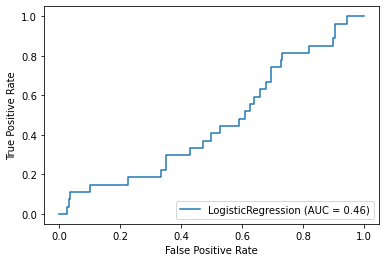

In [268]:
results [5, 1, 0] = (end_time-start_time)
results [5, 1, 1], results [5, 1, 2], results [5, 1, 3] = plotModel (lr_best_estimator, (end_time-start_time), X_train, y_train, X_test, y_test)

### 2.3.2. K-Means

In [269]:
start_time = time.time()

knn_model = sklearn.neighbors.KNeighborsClassifier(n_jobs=-1)
n_neighbor_values =  2**np.linspace(1, 8, 8, dtype=np.int32)
param_grid = {"n_neighbors": n_neighbor_values}

gridcv = sklearn.model_selection.GridSearchCV(knn_model, param_grid, verbose=0, cv=5)
gridcv.fit(X_train, y_train)
knn_best_estimator = gridcv.best_estimator_
knn_best_estimator_score = gridcv.best_score_

end_time = time.time()
print('Time: ', (end_time-start_time), ' seconds')
best_estimator_info[2]['knn'] = gridcv

Time:  2.098903179168701  seconds


KNeighborsClassifier(n_jobs=-1, n_neighbors=4)
Elapsed time:            2.0989 sec
Training accuracy score: 97.0500%
Test accuracy score:     97.3000%
ROC AUC score:           50.0000%


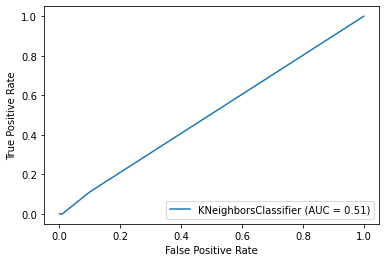

In [270]:
results [0, 1, 0] = (end_time-start_time)
results [0, 1, 1], results [0, 1, 2], results [0, 1, 3] = plotModel (knn_best_estimator, (end_time-start_time), X_train, y_train, X_test, y_test)

# 3. Activity Recognition Dataset

## 3.1. Data Loading

In [271]:
files = glob.glob(os.path.join(healthy_older_people_dataset_directory, 'Datasets_Healthy_Older_People', 'datasets', "S1_Dataset", "d*"))
Rs = [pd.read_csv(f, header=None) for f in files]
R=pd.concat(Rs,ignore_index=True).values
X1=R[:, 1:8]
y1=R[:, 8].astype(np.int32)

files = glob.glob(os.path.join(healthy_older_people_dataset_directory, 'Datasets_Healthy_Older_People', 'datasets', "S2_Dataset", "d*"))
Ts = [pd.read_csv(f, header=None) for f in files]
T=pd.concat(Ts,ignore_index=True).values
X2=T[:, 1:8]
y2=T[:, 8].astype(np.int32)

X = np.concatenate((X1, X2))
y = np.concatenate((y1, y2))

X = X[:5000]
y = y[:5000]

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape)

(4000, 7) (1000, 7)


## 3.2. Data Analysis

### 3.2.1. Counts

In [272]:
# No of Attributed

# columns = np.array(["Temperature", "Humidity", "Light", "CO2", "HumidityRatio"])
print('Input Columns Count:', X_train.shape[1])
# print('Input Columns:', columns)
# print('Output Column:', "Occupancy")
print()
print('Training Data')
print('Number of Rows:', X_train.shape[0])
print()
print('Test Data')
print('Number of Rows:', X_test.shape[0])

print('X[0]: ', X_train[0])
print('y[0]: ', y_train[0])

Input Columns Count: 7

Training Data
Number of Rows: 4000

Test Data
Number of Rows: 1000
X[0]:  [ 1.0459e+00 -1.8603e-01 -8.2102e-02  1.0000e+00 -6.7500e+01  1.5370e+00
  9.2425e+02]
y[0]:  3


## 3.3. Model Evaluation

### 3.3.1. Logistic Regression

In [273]:
start_time = time.time()

lr_model = sklearn.linear_model.LogisticRegression(n_jobs=-1)
max_iter_values = 2**np.linspace(1, 10, 10, dtype=np.int32)
solver_values = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
fit_intercept_values = [True, False]

param_grid = { "fit_intercept":[True, False], "solver": solver_values, 
             "max_iter": max_iter_values}

gridcv = sklearn.model_selection.GridSearchCV(lr_model, param_grid, verbose=0, cv=5)
gridcv.fit(X_train, y_train)
lr_best_estimator = gridcv.best_estimator_
lr_best_estimator_score = gridcv.best_score_

end_time = time.time()
print('Time: ', (end_time-start_time), ' seconds')
best_estimator_info[3]['lr'] = gridcv

Time:  107.7798445224762  seconds


In [274]:
results [5, 2, 0] = (end_time-start_time)
results [5, 2, 1], results [5, 2, 2], results [5, 2, 3] = plotModel (lr_best_estimator, (end_time-start_time), X_train, y_train, X_test, y_test)

LogisticRegression(max_iter=1024, n_jobs=-1)
Elapsed time:            107.7798 sec
Training accuracy score: 90.1750%
Test accuracy score:     88.9000%
ROC AUC score:           93.0769%


### 3.3.2. K-Means

In [275]:
start_time = time.time()

knn_model = sklearn.neighbors.KNeighborsClassifier(n_jobs=-1)
n_neighbor_values =  2**np.linspace(1, 8, 8, dtype=np.int32)
param_grid = {"n_neighbors": n_neighbor_values}

gridcv = sklearn.model_selection.GridSearchCV(knn_model, param_grid, verbose=0, cv=5)
gridcv.fit(X_train, y_train)
knn_best_estimator = gridcv.best_estimator_
knn_best_estimator_score = gridcv.best_score_

end_time = time.time()
print('Time: ', (end_time-start_time), ' seconds')
best_estimator_info[3]['knn'] = gridcv

Time:  1.606785774230957  seconds


In [276]:
results [0, 2, 0] = (end_time-start_time)
results [0, 2, 1], results [0, 2, 2], results [0, 2, 3] = plotModel (knn_best_estimator, (end_time-start_time), X_train, y_train, X_test, y_test)

KNeighborsClassifier(n_jobs=-1, n_neighbors=2)
Elapsed time:            1.6068 sec
Training accuracy score: 96.7500%
Test accuracy score:     93.6000%
ROC AUC score:           95.6488%


# 4. Bitcoin Ransonware Dataset

## 4.1. Data Loading

In [277]:
training_dataset_url = os.path.join(bitcoin_heist_ransonware_address_dataset_directory, 'data', 'BitcoinHeistData.csv')
print(training_dataset_url)


# Loading code
nrows=1000000
nparts=10
ntest=nrows//nparts
label_mapping = {'princetonCerber':1, 'princetonLocky':1, 'montrealCryptoLocker':1,
 'montrealCryptXXX':1, 'paduaCryptoWall':1, 'montrealWannaCry':1,
 'montrealDMALockerv3':1, 'montrealCryptoTorLocker2015':1, 'montrealSamSam':1,
 'montrealFlyper':1, 'montrealNoobCrypt':1, 'montrealDMALocker':1, 'montrealGlobe':1,
 'montrealEDA2':1, 'paduaKeRanger':1, 'montrealVenusLocker':1, 'montrealXTPLocker':1,
 'paduaJigsaw':1, 'montrealGlobev3':1, 'montrealJigSaw':1, 'montrealXLockerv5.0':1,
 'montrealXLocker':1, 'montrealRazy':1, 'montrealCryptConsole':1,
 'montrealGlobeImposter':1, 'montrealSam':1, 'montrealComradeCircle':1,
 'montrealAPT':1, 'white':0}

R=pd.read_csv(training_dataset_url, nrows=nrows, usecols=["year","day","length","weight","count","looped","neighbors","income","label"]).replace(label_mapping).values
np.random.seed(0)
np.random.shuffle(R)
X=R[:, 0:8]
y=R[:, 8].astype(np.int32)

X = X[:5000]
y = y[:5000]


X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape)

D:\pravesh\Concordia\2020-Fall\COMP-6321_ML\project\COMP-6321-ML\datasets\3_bitcoin_heist_ransonware_address\data\BitcoinHeistData.csv
(4000, 8) (1000, 8)


## 4.2. Data Analysis

### 4.2.1. Counts

In [278]:
# No of Attributed

# columns = np.array(["Temperature", "Humidity", "Light", "CO2", "HumidityRatio"])
print('Input Columns Count:', X_train.shape[1])
# print('Input Columns:', columns)
# print('Output Column:', "Occupancy")
print()
print('Training Data')
print('Number of Rows:', X_train.shape[0])
print()
print('Test Data')
print('Number of Rows:', X_test.shape[0])

print('X[0]: ', X_train[0])
print('y[0]: ', y_train[0])

Input Columns Count: 8

Training Data
Number of Rows: 4000

Test Data
Number of Rows: 1000
X[0]:  [2.01200000e+03 4.60000000e+01 2.00000000e+00 3.33333333e-01
 3.00000000e+00 0.00000000e+00 1.00000000e+00 3.25000000e+08]
y[0]:  0


## 4.3. Model Evaluation

### 4.3.1. Logistics Regression

In [279]:
start_time = time.time()

lr_model = sklearn.linear_model.LogisticRegression(n_jobs=-1)
max_iter_values = 2**np.linspace(1, 8, 8, dtype=np.int32)
solver_values = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
fit_intercept_values = [True, False]

param_grid = { "fit_intercept":[True, False], "solver": solver_values, 
             "max_iter": max_iter_values}
gridcv = sklearn.model_selection.GridSearchCV(lr_model, param_grid, verbose=0, cv=5)
gridcv.fit(X_train, y_train)
lr_best_estimator = gridcv.best_estimator_
lr_best_estimator_score = gridcv.best_score_

end_time = time.time()
print('Time: ', (end_time-start_time), ' seconds')
best_estimator_info[4]['lr'] = gridcv

Time:  19.85428237915039  seconds


LogisticRegression(max_iter=128, n_jobs=-1, solver='newton-cg')
Elapsed time:            19.8543 sec
Training accuracy score: 95.9000%
Test accuracy score:     95.6000%
ROC AUC score:           50.0000%


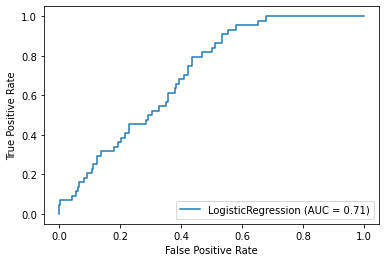

In [280]:
results [5, 3, 0] = (end_time-start_time)
results [5, 3, 1], results [5, 3, 2], results [5, 3, 3] = plotModel (lr_best_estimator, (end_time-start_time), X_train, y_train, X_test, y_test)

### 4.3.2. K-Means

In [281]:
start_time = time.time()

knn_model = sklearn.neighbors.KNeighborsClassifier(n_jobs=-1)
n_neighbor_values =  2**np.linspace(1, 8, 8, dtype=np.int32)
param_grid = {"n_neighbors": n_neighbor_values}

gridcv = sklearn.model_selection.GridSearchCV(knn_model, param_grid, verbose=0, cv=5)
gridcv.fit(X_train, y_train)
knn_best_estimator = gridcv.best_estimator_
knn_best_estimator_score = gridcv.best_score_

end_time = time.time()
print('Time: ', (end_time-start_time), ' seconds')
best_estimator_info[4]['knn'] = gridcv

Time:  1.7524900436401367  seconds


KNeighborsClassifier(n_jobs=-1, n_neighbors=32)
Elapsed time:            1.7525 sec
Training accuracy score: 95.8500%
Test accuracy score:     95.6000%
ROC AUC score:           50.0000%


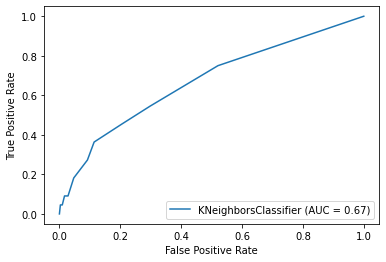

In [282]:
results [0, 3, 0] = (end_time-start_time)
results [0, 3, 1], results [0, 3, 2], results [0, 3, 3] = plotModel (knn_best_estimator, (end_time-start_time), X_train, y_train, X_test, y_test)

# 5. Montreal Crime Dataset

## 5.1. Data Loading

In [283]:
training_dataset_url = os.path.join(montreal_crime_dataset_directory, 'interventionscitoyendo.csv')


category_mapping = {'Introduction':1, 'Vol dans / sur véhicule à moteur':2, 'Vol de véhicule à moteur':3, 'Méfait':4, 'Vol qualifié':5, 'Infraction entraînant la mort':6, 'Vols qualifiés':5, 'Infractions entrainant la mort':6}
shift_mapping ={'jour':1, 'soir':2, 'nuit':3}
TR=pd.read_csv(training_dataset_url, encoding='latin1').replace(category_mapping).replace(shift_mapping)
TR['YEAR']=TR.DATE.str.split('-').str[0].astype(np.int32)
TR['MONTH']=TR.DATE.str.split('-').str[1].astype(np.int32)
TR['DAY']=TR.DATE.str.split('-').str[2].astype(np.int32)
TR.dropna(inplace=True)

R=TR.values
X = R[:, [2,3,4,5,6,7,9,10]]
y = R[:, 0].astype(np.int32)

X = X[:5000]
y = y[:5000]


X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape)

(4000, 8) (1000, 8)


## 5.2. Data Analysis

### 5.2.1. Counts

In [284]:
# No of Attributed

# columns = np.array(["Temperature", "Humidity", "Light", "CO2", "HumidityRatio"])
print('Input Columns Count:', X_train.shape[1])
# print('Input Columns:', columns)
# print('Output Column:', "Occupancy")
print()
print('Training Data')
print('Number of Rows:', X_train.shape[0])
print()
print('Test Data')
print('Number of Rows:', X_test.shape[0])

print('X[0]: ', X_train[0])
print('y[0]: ', y_train[0])

Input Columns Count: 8

Training Data
Number of Rows: 4000

Test Data
Number of Rows: 1000
X[0]:  [3 5.0 287119.7810100151 5034502.49999992 -73.72603463908422
 45.45022933601354 5 2]
y[0]:  1


## 5.3. Model Evaluation

### 5.3.1. Logistics Regression

In [285]:
start_time = time.time()

lr_model = sklearn.linear_model.LogisticRegression(n_jobs=-1)
max_iter_values = 2**np.linspace(1, 8, 8, dtype=np.int32)
solver_values = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
fit_intercept_values = [True, False]

param_grid = { "fit_intercept":[True, False], "solver": solver_values, 
             "max_iter": max_iter_values}
gridcv = sklearn.model_selection.GridSearchCV(lr_model, param_grid, verbose=0, cv=5)
gridcv.fit(X_train, y_train)
lr_best_estimator = gridcv.best_estimator_
lr_best_estimator_score = gridcv.best_score_

end_time = time.time()
print('Time: ', (end_time-start_time), ' seconds')
best_estimator_info[5]['lr'] = gridcv

Time:  70.38212561607361  seconds


In [286]:
results [5, 4, 0] = (end_time-start_time)
results [5, 4, 1], results [5, 4, 2], results [5, 4, 3] = plotModel (lr_best_estimator, (end_time-start_time), X_train, y_train, X_test, y_test)

LogisticRegression(fit_intercept=False, max_iter=128, n_jobs=-1,
                   solver='newton-cg')
Elapsed time:            70.3821 sec
Training accuracy score: 33.2750%
Test accuracy score:     32.6000%
ROC AUC score:           51.1852%


### 5.3.2. K-Means

In [287]:
start_time = time.time()

knn_model = sklearn.neighbors.KNeighborsClassifier(n_jobs=-1)
n_neighbor_values =  2**np.linspace(1, 8, 8, dtype=np.int32)
param_grid = {"n_neighbors": n_neighbor_values}

gridcv = sklearn.model_selection.GridSearchCV(knn_model, param_grid, verbose=0, cv=5)
gridcv.fit(X_train, y_train)
knn_best_estimator = gridcv.best_estimator_
knn_best_estimator_score = gridcv.best_score_

end_time = time.time()
print('Time: ', (end_time-start_time), ' seconds')
best_estimator_info[5]['knn'] = gridcv

Time:  1.7753517627716064  seconds


In [288]:
results [0, 4, 0] = (end_time-start_time)
results [0, 4, 1], results [0, 4, 2], results [0, 4, 3] = plotModel (knn_best_estimator, (end_time-start_time), X_train, y_train, X_test, y_test)

KNeighborsClassifier(n_jobs=-1, n_neighbors=32)
Elapsed time:            1.7754 sec
Training accuracy score: 43.6000%
Test accuracy score:     37.8000%
ROC AUC score:           56.4913%


# 6. Credit Cards Dataset

## 6.1. Data Loading

In [289]:
dataset_url = os.path.join(credit_cards_dataset_directory, 'default_of_credit_card_clients.csv')

TR=pd.read_csv(dataset_url, skiprows=1, usecols=[i for i in range(1,25)])
print(TR.shape)

R=TR.values
X = R[:, :23]
y = R[:, 23].astype(np.int32)
print(X[0])

X = X[:5000]
y = y[:5000]

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape)
print(X[0])
print(X_train[0])

(30000, 24)
[20000     2     2     1    24     2     2    -1    -1    -2    -2  3913
  3102   689     0     0     0     0   689     0     0     0     0]
(4000, 23) (1000, 23)
[20000     2     2     1    24     2     2    -1    -1    -2    -2  3913
  3102   689     0     0     0     0   689     0     0     0     0]
[200000      2      1      1     45     -2     -2     -2     -2     -2
     -2   1417  12643   3977      0   2500    199  12660   3977      0
   2500    199   2944]


## 6.2. Data Analysis

### 6.2.1. Counts

In [290]:
# No of Attributed

# columns = np.array(["Temperature", "Humidity", "Light", "CO2", "HumidityRatio"])
print('Input Columns Count:', X_train.shape[1])
# print('Input Columns:', columns)
# print('Output Column:', "Occupancy")
print()
print('Training Data')
print('Number of Rows:', X_train.shape[0])
print()
print('Test Data')
print('Number of Rows:', X_test.shape[0])

print('X[0]: ', X_train[0])
print('y[0]: ', y_train[0])

Input Columns Count: 23

Training Data
Number of Rows: 4000

Test Data
Number of Rows: 1000
X[0]:  [200000      2      1      1     45     -2     -2     -2     -2     -2
     -2   1417  12643   3977      0   2500    199  12660   3977      0
   2500    199   2944]
y[0]:  0


## 6.3. Model Evaluation

### 6.3.1. Logistics Regression

In [291]:
start_time = time.time()

lr_model = sklearn.linear_model.LogisticRegression(n_jobs=-1)
max_iter_values = 2**np.linspace(1, 10, 10, dtype=np.int32)
solver_values = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
fit_intercept_values = [True, False]

param_grid = { "fit_intercept":[True, False], "solver": solver_values, 
             "max_iter": max_iter_values}
gridcv = sklearn.model_selection.GridSearchCV(lr_model, param_grid, verbose=0, cv=5)
gridcv.fit(X_train, y_train)
lr_best_estimator = gridcv.best_estimator_
lr_best_estimator_score = gridcv.best_score_

end_time = time.time()
print('Time: ', (end_time-start_time), ' seconds')
best_estimator_info[6]['lr'] = gridcv

Time:  72.58757281303406  seconds


LogisticRegression(fit_intercept=False, max_iter=256, n_jobs=-1,
                   solver='newton-cg')
Elapsed time:            72.5876 sec
Training accuracy score: 79.4500%
Test accuracy score:     81.1000%
ROC AUC score:           59.0092%


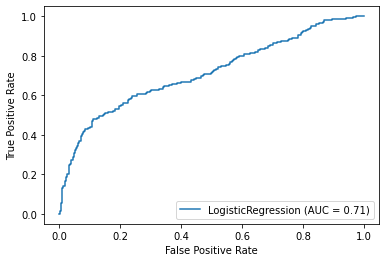

In [292]:
results [5, 5, 0] = (end_time-start_time)
results [5, 5, 1], results [5, 5, 2], results [5, 5, 3] = plotModel (lr_best_estimator, (end_time-start_time), X_train, y_train, X_test, y_test)

### 6.3.2. K-Means

In [293]:
start_time = time.time()

knn_model = sklearn.neighbors.KNeighborsClassifier(n_jobs=-1)
n_neighbor_values =  2**np.linspace(1, 8, 8, dtype=np.int32)
param_grid = {"n_neighbors": n_neighbor_values}

gridcv = sklearn.model_selection.GridSearchCV(knn_model, param_grid, verbose=0, cv=5)
gridcv.fit(X_train, y_train)
knn_best_estimator = gridcv.best_estimator_
knn_best_estimator_score = gridcv.best_score_

end_time = time.time()
print('Time: ', (end_time-start_time), ' seconds')
best_estimator_info[6]['knn'] = gridcv

Time:  2.4772908687591553  seconds


KNeighborsClassifier(n_jobs=-1, n_neighbors=128)
Elapsed time:            2.4773 sec
Training accuracy score: 77.6250%
Test accuracy score:     79.1000%
ROC AUC score:           50.0000%


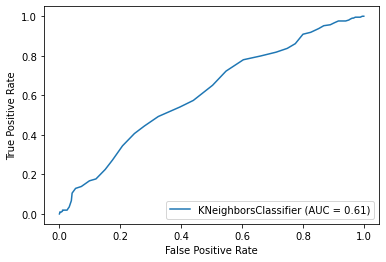

In [294]:
results [0, 5, 0] = (end_time-start_time)
results [0, 5, 1], results [0, 5, 2], results [0, 5, 3] = plotModel (knn_best_estimator, (end_time-start_time), X_train, y_train, X_test, y_test)

# 7. Census Income Dataset

## 7.1. Data Loading

In [295]:
dataset_url = os.path.join(census_income_dataset_directory, 'adult_data.csv')

TR=pd.read_csv(dataset_url, encoding='utf8', header=None)
TR = TR.apply(lambda x: x.apply(lambda y: y.strip() if type(y) == type('') else y), axis=0)

workclass_mapping = {'Private':1, 'Self-emp-not-inc':2
                    , 'Self-emp-inc':3, 'Federal-gov':4
                    , 'Local-gov':5, 'State-gov':6
                    , 'Without-pay':7, 'Never-worked':8}
TR = TR.replace(workclass_mapping)


education_mapping = {'Bachelors':1, 'Some-college':2, '11th':3
                     , 'HS-grad':4, 'Prof-school':5, 'Assoc-acdm':6
                     , 'Assoc-voc':7, '9th':8, '7th-8th':9
                     , '12th':10, 'Masters':11, '1st-4th':12
                     , '10th':13, 'Doctorate':14, '5th-6th':15
                     , 'Preschool':16}
TR = TR.replace(education_mapping)

marital_status_mapping = {'Married-civ-spouse':1, 'Divorced':2, 'Never-married':3
                          , 'Separated':4, 'Widowed':5, 'Married-spouse-absent':6
                          , 'Married-AF-spouse':7}
TR = TR.replace(marital_status_mapping)

occupation_mapping = {'Tech-support':1, 'Craft-repair':2, 'Other-service':3
                      , 'Sales':4, 'Exec-managerial':5, 'Prof-specialty':6
                      , 'Handlers-cleaners':7, 'Machine-op-inspct':8, 'Adm-clerical':9
                      , 'Farming-fishing':10, 'Transport-moving':11, 'Priv-house-serv':12
                      , 'Protective-serv':13, 'Armed-Forces':14}
TR = TR.replace(occupation_mapping)

relationship_mapping = {'Wife':1, 'Own-child':2, 'Husband':3
                , 'Not-in-family':4, 'Other-relative':5, 'Unmarried':6}
TR = TR.replace(relationship_mapping)

race_mapping = {'White':1, 'Asian-Pac-Islander':2, 'Amer-Indian-Eskimo':3
                , 'Other':4, 'Black':5}
TR = TR.replace(race_mapping)

sex_mapping = {'Female':1, 'Male':2}
TR = TR.replace(sex_mapping)

country_mapping = {'United-States':1, 'Cambodia':2, 'England':3
                   , 'Puerto-Rico':4, 'Canada':5, 'Germany':6
                   , 'Outlying-US(Guam-USVI-etc)':7, 'India':8
                   , 'Japan':9, 'Greece':10, 'South':11
                   , 'China':12, 'Cuba':13, 'Iran':14
                   , 'Honduras':15, 'Philippines':16, 'Italy':17
                   , 'Poland':18, 'Jamaica':19, 'Vietnam':20
                   , 'Mexico':21, 'Portugal':22, 'Ireland':23
                   , 'France':24, 'Dominican-Republic':25, 'Laos':26
                   , 'Ecuador':27, 'Taiwan':28, 'Haiti':29
                   , 'Columbia':30, 'Hungary':31, 'Guatemala':32
                   , 'Nicaragua':33, 'Scotland':34, 'Thailand':35
                   , 'Yugoslavia':36, 'El-Salvador':37, 'Trinadad&Tobago':38
                   , 'Peru':39, 'Hong':40, 'Holand-Netherlands':41}
TR = TR.replace(country_mapping)

salary_mapping = {'<=50K':0, '>50K':1}
TR = TR.replace(salary_mapping)

TR = TR.replace(to_replace='?', value=np.nan)
TR.dropna(inplace=True)

R=TR.values
shape = R.shape
X = R[:, :shape[1]-1].astype(np.float32)
y = R[:, shape[1]-1].astype(np.int32)
print(X[0], y[0])

X = X[:5000]
y = y[:5000]

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape)

[3.9000e+01 6.0000e+00 7.7516e+04 1.0000e+00 1.3000e+01 3.0000e+00
 9.0000e+00 4.0000e+00 1.0000e+00 2.0000e+00 2.1740e+03 0.0000e+00
 4.0000e+01 1.0000e+00] 0
(4000, 14) (1000, 14)


## 7.2. Data Analysis

### 7.2.1. Counts

In [296]:
# No of Attributed

# columns = np.array(["Temperature", "Humidity", "Light", "CO2", "HumidityRatio"])
print('Input Columns Count:', X_train.shape[1])
# print('Input Columns:', columns)
# print('Output Column:', "Occupancy")
print()
print('Training Data')
print('Number of Rows:', X_train.shape[0])
print()
print('Test Data')
print('Number of Rows:', X_test.shape[0])

print('X[0]: ', X_train[0])
print('y[0]: ', y_train[0])

Input Columns Count: 14

Training Data
Number of Rows: 4000

Test Data
Number of Rows: 1000
X[0]:  [4.10000e+01 6.00000e+00 3.55756e+05 2.00000e+00 1.00000e+01 3.00000e+00
 6.00000e+00 4.00000e+00 1.00000e+00 2.00000e+00 0.00000e+00 0.00000e+00
 4.00000e+01 1.00000e+00]
y[0]:  0


## 7.3. Model Evaluation

### 7.3.1. Logistics Regression

In [297]:
start_time = time.time()

lr_model = sklearn.linear_model.LogisticRegression(n_jobs=-1)
max_iter_values = 2**np.linspace(8, 15, 8, dtype=np.int32)
solver_values = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
fit_intercept_values = [True, False]
penalty_values = ['none', 'l1', 'l2']
random_state_values = [0, None]
C_values = 2**np.linspace(1, 4, 4, dtype=np.int32)

param_grid = { "fit_intercept":fit_intercept_values, "solver": solver_values
              , "max_iter": max_iter_values, 'penalty': penalty_values
             , 'random_state': random_state_values, 'C': C_values}
gridcv = sklearn.model_selection.GridSearchCV(lr_model, param_grid, verbose=0, cv=5)
gridcv.fit(X_train, y_train)
lr_best_estimator = gridcv.best_estimator_
lr_best_estimator_score = gridcv.best_score_

end_time = time.time()
print('Time: ', (end_time-start_time), ' seconds')
best_estimator_info[7]['lr'] = gridcv

Time:  5675.058593273163  seconds


LogisticRegression(C=4, max_iter=32768, n_jobs=-1, penalty='l1',
                   solver='liblinear')
Elapsed time:            5675.0586 sec
Training accuracy score: 83.3750%
Test accuracy score:     82.4000%
ROC AUC score:           72.3385%


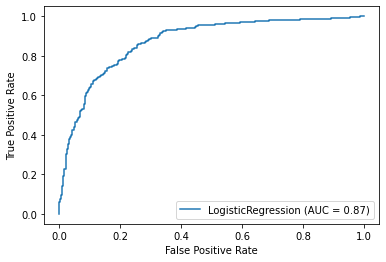

In [298]:
results [5, 6, 0] = (end_time-start_time)
results [5, 6, 1], results [5, 6, 2], results [5, 6, 3] = plotModel (lr_best_estimator, (end_time-start_time), X_train, y_train, X_test, y_test)

### 7.3.2. K-Means

In [299]:
start_time = time.time()

knn_model = sklearn.neighbors.KNeighborsClassifier(n_jobs=-1)
n_neighbor_values =  2**np.linspace(1, 8, 8, dtype=np.int32)
param_grid = {"n_neighbors": n_neighbor_values}

gridcv = sklearn.model_selection.GridSearchCV(knn_model, param_grid, verbose=0, cv=5)
gridcv.fit(X_train, y_train)
knn_best_estimator = gridcv.best_estimator_
knn_best_estimator_score = gridcv.best_score_

end_time = time.time()
print('Time: ', (end_time-start_time), ' seconds')
best_estimator_info[7]['knn'] = gridcv

Time:  2.349282741546631  seconds


KNeighborsClassifier(n_jobs=-1, n_neighbors=8)
Elapsed time:            2.3493 sec
Training accuracy score: 79.5250%
Test accuracy score:     76.8000%
ROC AUC score:           56.5557%


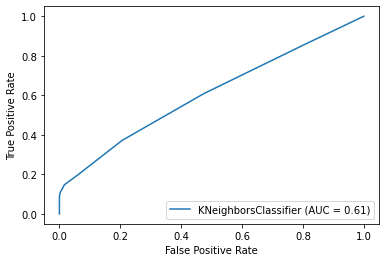

In [300]:
results [0, 6, 0] = (end_time-start_time)
results [0, 6, 1], results [0, 6, 2], results [0, 6, 3] = plotModel (knn_best_estimator, (end_time-start_time), X_train, y_train, X_test, y_test)

# 8. Yeast Dataset

## 8.1. Data Loading

In [301]:
dataset_url = os.path.join(yeast_dataset_directory, 'yeast_dataset.csv')

f = open(dataset_url, "rt")
lines = f.readlines()
f.close()

for index, line in enumerate(lines):
    lines[index] = ",".join(line.split()) + '\n'
f = open(dataset_url, "wt")
f.writelines(lines)
f.close()

TR=pd.read_csv(dataset_url, encoding='utf8', header=None, usecols = np.arange(1, 10, 1))
TR = TR.apply(lambda x: x.apply(lambda y: y.strip() if type(y) == type('') else y), axis=0)

localization_site_mapping = {'MIT':1, 'NUC':2, 'CYT':3
                     , 'ME1':4, 'EXC':5, 'ME2':6
                     , 'ME3':7, 'VAC':8, 'POX':9
                     , 'ERL':10}
TR = TR.replace(localization_site_mapping)

TR = TR.replace(to_replace='?', value=np.nan)
TR.dropna(inplace=True)

R=TR.values
shape = R.shape
X = R[:, :shape[1]-1].astype(np.float32)
y = R[:, shape[1]-1].astype(np.int32)
print(X[0], y[0])

X = X[:5000]
y = y[:5000]

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape)

[0.58 0.61 0.47 0.13 0.5  0.   0.48 0.22] 1
(1187, 8) (297, 8)


## 8.2. Data Analysis

### 8.2.1. Counts

In [302]:
# No of Attributed

# columns = np.array(["Temperature", "Humidity", "Light", "CO2", "HumidityRatio"])
print('Input Columns Count:', X_train.shape[1])
# print('Input Columns:', columns)
# print('Output Column:', "Occupancy")
print()
print('Training Data')
print('Number of Rows:', X_train.shape[0])
print()
print('Test Data')
print('Number of Rows:', X_test.shape[0])

print('X[0]: ', X_train[0])
print('y[0]: ', y_train[0])

Input Columns Count: 8

Training Data
Number of Rows: 1187

Test Data
Number of Rows: 297
X[0]:  [0.4  0.51 0.42 0.13 0.5  0.   0.45 0.25]
y[0]:  7


## 8.3. Model Evaluation

### 8.3.1. Logistics Regression

In [303]:
start_time = time.time()

lr_model = sklearn.linear_model.LogisticRegression(n_jobs=-1, multi_class = 'multinomial')
max_iter_values = 2**np.linspace(1, 10, 10, dtype=np.int32)
solver_values = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
fit_intercept_values = [True, False]

param_grid = { "fit_intercept":[True, False], "solver": solver_values, 
             "max_iter": max_iter_values}
gridcv = sklearn.model_selection.GridSearchCV(lr_model, param_grid, verbose=0, cv=5)
gridcv.fit(X_train, y_train)
lr_best_estimator = gridcv.best_estimator_
lr_best_estimator_score = gridcv.best_score_

end_time = time.time()
print('Time: ', (end_time-start_time), ' seconds')
best_estimator_info[8]['lr'] = gridcv

Time:  15.659709692001343  seconds


In [304]:
results [5, 7, 0] = (end_time-start_time)
results [5, 7, 1], results [5, 7, 2], results [5, 7, 3] = plotModel (lr_best_estimator, (end_time-start_time), X_train, y_train, X_test, y_test)

LogisticRegression(max_iter=32, multi_class='multinomial', n_jobs=-1,
                   solver='sag')
Elapsed time:            15.6597 sec
Training accuracy score: 55.8551%
Test accuracy score:     56.5657%
ROC AUC score:           69.7546%


### 8.3.2. K-Means

In [305]:
start_time = time.time()

knn_model = sklearn.neighbors.KNeighborsClassifier(n_jobs=-1)
n_neighbor_values =  2**np.linspace(1, 8, 8, dtype=np.int32)
param_grid = {"n_neighbors": n_neighbor_values}

gridcv = sklearn.model_selection.GridSearchCV(knn_model, param_grid, verbose=0, cv=5)
gridcv.fit(X_train, y_train)
knn_best_estimator = gridcv.best_estimator_
knn_best_estimator_score = gridcv.best_score_

end_time = time.time()
print('Time: ', (end_time-start_time), ' seconds')
best_estimator_info[8]['knn'] = gridcv

Time:  0.9674160480499268  seconds


In [306]:
results [0, 7, 0] = (end_time-start_time)
results [0, 7, 1], results [0, 7, 2], results [0, 7, 3] = plotModel (knn_best_estimator, (end_time-start_time), X_train, y_train, X_test, y_test)

KNeighborsClassifier(n_jobs=-1, n_neighbors=16)
Elapsed time:            0.9674 sec
Training accuracy score: 62.3420%
Test accuracy score:     58.5859%
ROC AUC score:           72.2361%


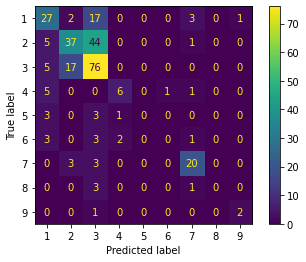

In [307]:
sklearn.metrics.plot_confusion_matrix(lr_best_estimator, X_test, y_test)

# Reporting

In [312]:
model_indexes = [0, 5]
for i in range(4):
    print (stats_labels[i])
    print ("                       ", end='')
    for j in model_indexes:
        print (methods[j]+"  ", end='')
    print (" ")
    for k in range(8):
        print ('{:22s}'.format(datasets[k])+" ", end='')
        for j in model_indexes:
            print ("{:8.2f}".format(results[j, k, i])+'       ', end='')
        print (" ")
    print (" ")

Elapsed Time
                       K-nearest neighbours  Logistic regression   
Occupancy                  1.56         643.23        
Bank Marketing             2.10          14.33        
Activity Recognition       1.61         107.78        
Bitcoin Ransomware         1.75          19.85        
Montreal Crime             1.78          70.38        
Credit Card                2.48          72.59        
Census Income              2.35        5675.06        
Yeast                      0.97          15.66        
 
Training Accuracy Score
                       K-nearest neighbours  Logistic regression   
Occupancy                 98.45          97.62        
Bank Marketing            97.05          97.05        
Activity Recognition      96.75          90.18        
Bitcoin Ransomware        95.85          95.90        
Montreal Crime            43.60          33.27        
Credit Card               77.62          79.45        
Census Income             79.53          83.38        
